# Finance Podcasts - Analysing the Episodes

### This will be an attempt to analyse the episodes of personal finance podcasts data downloaded using the [Spotify](https://developer.spotify.com/) API  

In [1]:
import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
print("Done")

Done


In [2]:
df = pd.read_csv('fin_episodes.csv', index_col=0)
df.head()

,ep_id,ep_duration,ep_release_date,ep_name,ep_description,ep_audio_preview_url,show_id
0,0ntJn4yJVV4umVjwnGKRgn,2624052,2020-07-15,Shadow Banking Scandal: Dollar Swap Lines,The most alarming interview you’ll listen to ...,https://p.scdn.co/mp3-preview/92fc516438c36aa2...,5rlksOLniypAgBEkebMkoo
1,55Fkq503PHqrk2sDFgSJkJ,2568620,2020-07-13,"Three Things Are Certain in Life: Death, Taxe...",Gold became money as determined by the free ma...,https://p.scdn.co/mp3-preview/891291d29d35578f...,5rlksOLniypAgBEkebMkoo
2,6mPZv163rYpSGxeU22jZMx,2126968,2020-07-08,Crypto Expert Predicts Bitcoin Will Hit 100k: ...,Bitcoin and other cryptocurrencies are now cha...,https://p.scdn.co/mp3-preview/8670aa67a8781cd1...,5rlksOLniypAgBEkebMkoo
3,6MmCicD7bBdyCX4eiGceCj,2214922,2020-07-01,How to Begin Writing Your Own Book—and Make Mo...,"In 1997, the book Rich Dad Poor Dad was self-p...",https://p.scdn.co/mp3-preview/fc9d04eb158ab211...,5rlksOLniypAgBEkebMkoo
4,0x5QHf5oHj0kszmhZ4mYSM,1625287,2020-06-29,Cutting America’s Dependence on China for Medi...,When the coronavirus pandemic struck in the Un...,https://p.scdn.co/mp3-preview/fba59ce64262e359...,5rlksOLniypAgBEkebMkoo


### Some data pre-processing and visualisation

In [3]:
df['ep_duration'] = (df['ep_duration']/60000).astype(int) #convert episode duration to minutes
df

,ep_id,ep_duration,ep_release_date,ep_name,ep_description,ep_audio_preview_url,show_id
0,0ntJn4yJVV4umVjwnGKRgn,43,2020-07-15,Shadow Banking Scandal: Dollar Swap Lines,The most alarming interview you’ll listen to ...,https://p.scdn.co/mp3-preview/92fc516438c36aa2...,5rlksOLniypAgBEkebMkoo
1,55Fkq503PHqrk2sDFgSJkJ,42,2020-07-13,"Three Things Are Certain in Life: Death, Taxe...",Gold became money as determined by the free ma...,https://p.scdn.co/mp3-preview/891291d29d35578f...,5rlksOLniypAgBEkebMkoo
2,6mPZv163rYpSGxeU22jZMx,35,2020-07-08,Crypto Expert Predicts Bitcoin Will Hit 100k: ...,Bitcoin and other cryptocurrencies are now cha...,https://p.scdn.co/mp3-preview/8670aa67a8781cd1...,5rlksOLniypAgBEkebMkoo
3,6MmCicD7bBdyCX4eiGceCj,36,2020-07-01,How to Begin Writing Your Own Book—and Make Mo...,"In 1997, the book Rich Dad Poor Dad was self-p...",https://p.scdn.co/mp3-preview/fc9d04eb158ab211...,5rlksOLniypAgBEkebMkoo
4,0x5QHf5oHj0kszmhZ4mYSM,27,2020-06-29,Cutting America’s Dependence on China for Medi...,When the coronavirus pandemic struck in the Un...,https://p.scdn.co/mp3-preview/fba59ce64262e359...,5rlksOLniypAgBEkebMkoo
...,...,...,...,...,...,...,...
27849,3Ze8QJfFVtOq7K4t5MMdVN,36,2020-04-03,Almost Abstract Outdoor News - 3rd April 2020,We Get Outdoors decided to take things to a ne...,https://p.scdn.co/mp3-preview/694912c7e74c56aa...,51l9jW0oK963nzZyWrNrKU
27850,33g0vk9HRLErnQZqagv9fB,57,2020-03-31,How I survived 3 Naked and Afraid Challenges w...,"In this episode, EJ and Mark discuss how to su...",https://p.scdn.co/mp3-preview/bde07774ad150a70...,51l9jW0oK963nzZyWrNrKU
27851,6JfpyNA2Eoq49Kg3P3wUP8,12,2020-03-30,COVID 19 - Get Outdoors Safely with Rob Yates,In this first episode We Get Outdoors co-found...,https://p.scdn.co/mp3-preview/2174eff0157e07e4...,51l9jW0oK963nzZyWrNrKU
27852,4jJLYKenuKJ39sxCTz6XRG,66,2020-03-24,How To Sail around the World with Sailing Magi...,This episode is brought to you by the We Get O...,https://p.scdn.co/mp3-preview/c86d6ea6d929b98e...,51l9jW0oK963nzZyWrNrKU


In [4]:
df['ep_duration'].describe() #summary stats for the episode duration column

count    27854.000000
mean        32.262260
std         22.059156
min          0.000000
25%         14.000000
50%         30.000000
75%         46.000000
max        234.000000
Name: ep_duration, dtype: float64

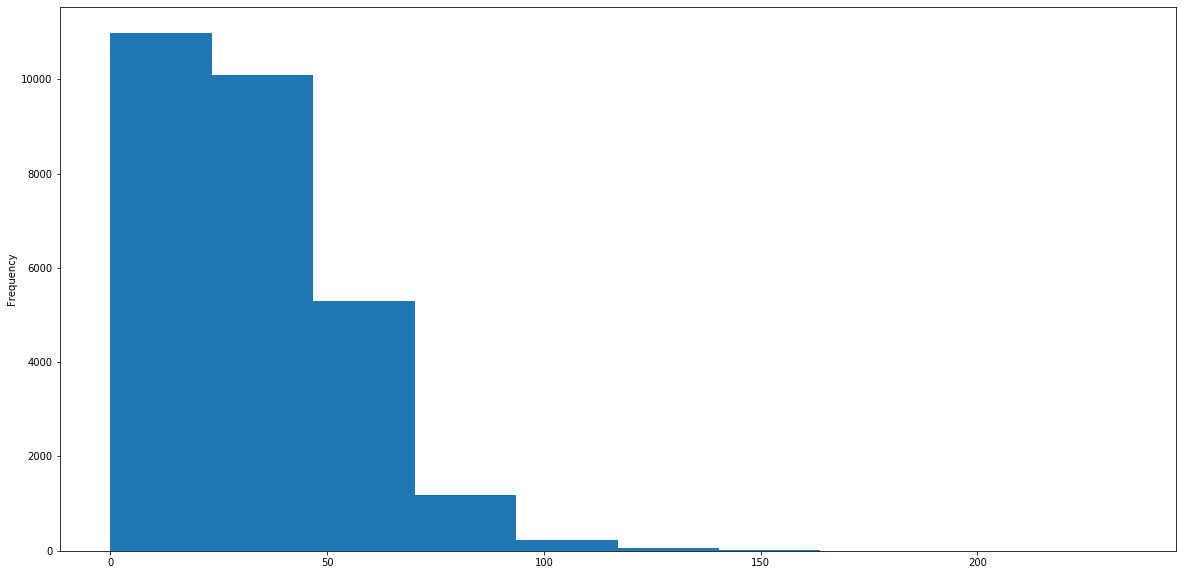

In [5]:
plt.figure(figsize=(20,10))
df['ep_duration'].plot(kind='hist')
plt.savefig('eps_duration.png'); #distribution of episode lengths at this stage

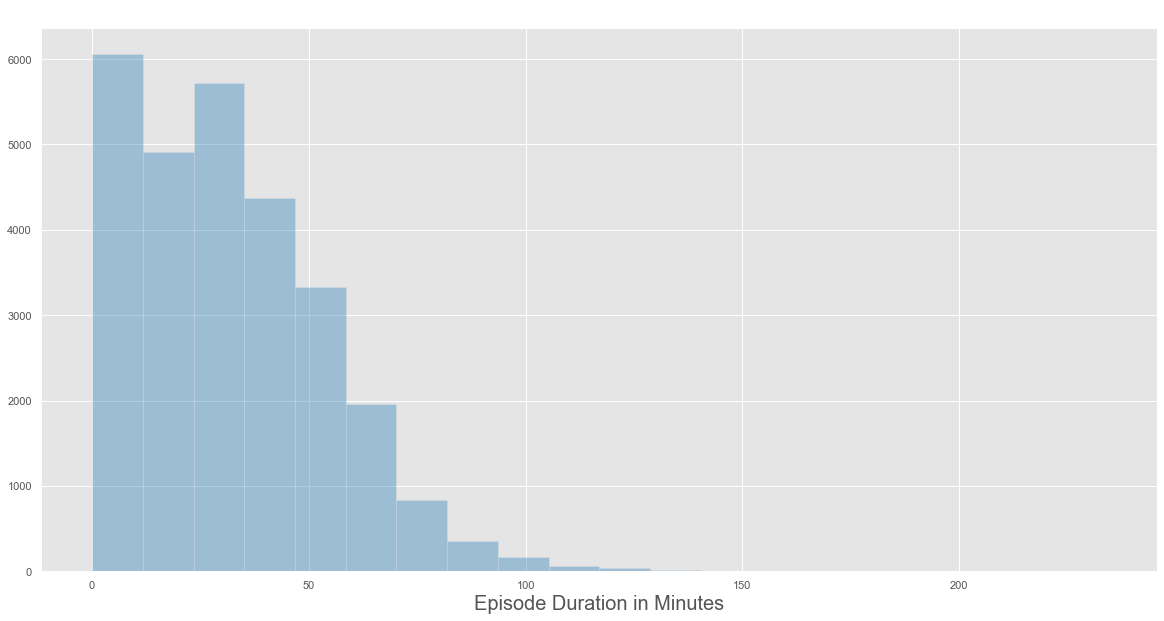

In [27]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
sns.distplot(df['ep_duration'],kde=False, bins=20,color='#3182bd')
plt.xlabel('Episode Duration in Minutes',fontsize=20)
plt.title('Distribution of Episode Lengths',fontsize=20)
plt.savefig('epi_duration.png');

### The episodes need to be mapped with the show names. The show data will be read in again.

In [28]:
df_fin = pd.read_csv('en_podcasts.csv',index_col=0)
df_fin.head(10)

,id,name,description,languages,publisher
2,5rlksOLniypAgBEkebMkoo,Rich Dad Radio Show: In-Your-Face Advice on In...,"Beat conventional advice on personal finance, ...",['en'],The Rich Dad Radio Network
3,54VydTdMDHkfqPqzlwRJFa,Listen Money Matters - Free your inner financi...,Honest and uncensored - this is not your fathe...,['en'],ListenMoneyMatters.com | Andrew Fiebert and Ma...
5,6o8lC0CcRlIclZsbkEOaRL,Optimal Finance Daily,Why bother searching for the best blogs about ...,['en'],Dan | Optimal Living Daily
7,3oW8SnmePemy5pOsTTvQjY,Self Help for Life Podcast: Self-Improvement |...,Paul Thomas from the Self Help for Life blog s...,['en-GB'],"Paul Thomas : Clinical Hypnotherapist, Life an..."
8,49an3JD6uAaqEw5qQS8tie,My Personal Finances PodCat,PodCat is a weekly financial podcast helping y...,['en'],My Personal Finances
12,08IF2pM2RjjZ6jxafHnmPp,Radical Personal Finance,"Joshua J Sheats, MSFS, CFP®, CLU®, ChFC®, CASL...",['en-US'],Joshua Sheats
13,5hwcwChU0bWy1EFBNul7ld,Why Didn't They Teach Me This In School - Mone...,This podcast focuses on learning how to effect...,['en'],Cary Siegel
17,3iwRYmT3VIYrGC9NdRv2ya,The Meaningful Money Personal Finance Podcast,Pete Matthew discusses and explains all aspect...,['en'],Pete Matthew
21,1OUBkO5jLr3xNL2CSQffKM,The Scope of Practice Podcast for Business and...,"Dr. Brent W. Lacey, M.D. teaches healthcare pr...",['en-US'],Brent Lacey : physician : personal finance : b...
22,4i7qGU4QdWzUAW7r1eikTr,Dev Raga - Personal Finance Podcasts,Dev Raga is a Melbourne (Australia) based podc...,['en'],Dev Raga


In [29]:
fmap = df_fin.groupby('id')['name'].apply(list).to_dict()

In [30]:
df['show_id'] = df['show_id'].map(fmap)

In [31]:
df.head(10)

,ep_id,ep_duration,ep_release_date,ep_name,ep_description,ep_audio_preview_url,show_id
0,0ntJn4yJVV4umVjwnGKRgn,43,2020-07-15,Shadow Banking Scandal: Dollar Swap Lines,The most alarming interview you’ll listen to ...,https://p.scdn.co/mp3-preview/92fc516438c36aa2...,[Rich Dad Radio Show: In-Your-Face Advice on I...
1,55Fkq503PHqrk2sDFgSJkJ,42,2020-07-13,"Three Things Are Certain in Life: Death, Taxe...",Gold became money as determined by the free ma...,https://p.scdn.co/mp3-preview/891291d29d35578f...,[Rich Dad Radio Show: In-Your-Face Advice on I...
2,6mPZv163rYpSGxeU22jZMx,35,2020-07-08,Crypto Expert Predicts Bitcoin Will Hit 100k: ...,Bitcoin and other cryptocurrencies are now cha...,https://p.scdn.co/mp3-preview/8670aa67a8781cd1...,[Rich Dad Radio Show: In-Your-Face Advice on I...
3,6MmCicD7bBdyCX4eiGceCj,36,2020-07-01,How to Begin Writing Your Own Book—and Make Mo...,"In 1997, the book Rich Dad Poor Dad was self-p...",https://p.scdn.co/mp3-preview/fc9d04eb158ab211...,[Rich Dad Radio Show: In-Your-Face Advice on I...
4,0x5QHf5oHj0kszmhZ4mYSM,27,2020-06-29,Cutting America’s Dependence on China for Medi...,When the coronavirus pandemic struck in the Un...,https://p.scdn.co/mp3-preview/fba59ce64262e359...,[Rich Dad Radio Show: In-Your-Face Advice on I...
5,4xHvhJQ8c5QDxrHEs9iFqE,46,2020-06-24,How to Become an Entrepreneur During a Crisis,Most people are trained to avoid mistakes. Rat...,https://p.scdn.co/mp3-preview/6acec7c1fc9d62a6...,[Rich Dad Radio Show: In-Your-Face Advice on I...
6,7hVfSKX5f38xb7NLrSprIm,41,2020-06-17,The Original Internet Godfather: From FBI’s Mo...,Online crime often succeeds because of failure...,https://p.scdn.co/mp3-preview/cfc3b9e3277177f3...,[Rich Dad Radio Show: In-Your-Face Advice on I...
7,564sKNjrbxAC3GavOimrEd,42,2020-06-15,How to Prepare for the Future and Avoid Being ...,As the global financial crisis spreads and the...,https://p.scdn.co/mp3-preview/0011802fef2b2d13...,[Rich Dad Radio Show: In-Your-Face Advice on I...
8,3ZiYQqVRMGmyUAo2rQS996,33,2020-06-10,Can the U.S. print its way out of financial di...,The Fed has been printing trillions of dollars...,https://p.scdn.co/mp3-preview/261dbbb557d3e98d...,[Rich Dad Radio Show: In-Your-Face Advice on I...
9,3HWUOPphDByAH4BPuoy7gy,35,2020-06-03,Investing Outside the Central Bank,"The Federal Reserve, the United States central...",https://p.scdn.co/mp3-preview/6051373aef8a1284...,[Rich Dad Radio Show: In-Your-Face Advice on I...


In [33]:
#Fix the show name by removing the brackets and rename the column

df.rename(columns={'show_id':'show_name'}, inplace=True)
df.head(10)

,ep_id,ep_duration,ep_release_date,ep_name,ep_description,ep_audio_preview_url,show_name
0,0ntJn4yJVV4umVjwnGKRgn,43,2020-07-15,Shadow Banking Scandal: Dollar Swap Lines,The most alarming interview you’ll listen to ...,https://p.scdn.co/mp3-preview/92fc516438c36aa2...,[Rich Dad Radio Show: In-Your-Face Advice on I...
1,55Fkq503PHqrk2sDFgSJkJ,42,2020-07-13,"Three Things Are Certain in Life: Death, Taxe...",Gold became money as determined by the free ma...,https://p.scdn.co/mp3-preview/891291d29d35578f...,[Rich Dad Radio Show: In-Your-Face Advice on I...
2,6mPZv163rYpSGxeU22jZMx,35,2020-07-08,Crypto Expert Predicts Bitcoin Will Hit 100k: ...,Bitcoin and other cryptocurrencies are now cha...,https://p.scdn.co/mp3-preview/8670aa67a8781cd1...,[Rich Dad Radio Show: In-Your-Face Advice on I...
3,6MmCicD7bBdyCX4eiGceCj,36,2020-07-01,How to Begin Writing Your Own Book—and Make Mo...,"In 1997, the book Rich Dad Poor Dad was self-p...",https://p.scdn.co/mp3-preview/fc9d04eb158ab211...,[Rich Dad Radio Show: In-Your-Face Advice on I...
4,0x5QHf5oHj0kszmhZ4mYSM,27,2020-06-29,Cutting America’s Dependence on China for Medi...,When the coronavirus pandemic struck in the Un...,https://p.scdn.co/mp3-preview/fba59ce64262e359...,[Rich Dad Radio Show: In-Your-Face Advice on I...
5,4xHvhJQ8c5QDxrHEs9iFqE,46,2020-06-24,How to Become an Entrepreneur During a Crisis,Most people are trained to avoid mistakes. Rat...,https://p.scdn.co/mp3-preview/6acec7c1fc9d62a6...,[Rich Dad Radio Show: In-Your-Face Advice on I...
6,7hVfSKX5f38xb7NLrSprIm,41,2020-06-17,The Original Internet Godfather: From FBI’s Mo...,Online crime often succeeds because of failure...,https://p.scdn.co/mp3-preview/cfc3b9e3277177f3...,[Rich Dad Radio Show: In-Your-Face Advice on I...
7,564sKNjrbxAC3GavOimrEd,42,2020-06-15,How to Prepare for the Future and Avoid Being ...,As the global financial crisis spreads and the...,https://p.scdn.co/mp3-preview/0011802fef2b2d13...,[Rich Dad Radio Show: In-Your-Face Advice on I...
8,3ZiYQqVRMGmyUAo2rQS996,33,2020-06-10,Can the U.S. print its way out of financial di...,The Fed has been printing trillions of dollars...,https://p.scdn.co/mp3-preview/261dbbb557d3e98d...,[Rich Dad Radio Show: In-Your-Face Advice on I...
9,3HWUOPphDByAH4BPuoy7gy,35,2020-06-03,Investing Outside the Central Bank,"The Federal Reserve, the United States central...",https://p.scdn.co/mp3-preview/6051373aef8a1284...,[Rich Dad Radio Show: In-Your-Face Advice on I...


In [34]:
df['show_name'] = df['show_name'].str[0]
df.head(10)

,ep_id,ep_duration,ep_release_date,ep_name,ep_description,ep_audio_preview_url,show_name
0,0ntJn4yJVV4umVjwnGKRgn,43,2020-07-15,Shadow Banking Scandal: Dollar Swap Lines,The most alarming interview you’ll listen to ...,https://p.scdn.co/mp3-preview/92fc516438c36aa2...,Rich Dad Radio Show: In-Your-Face Advice on In...
1,55Fkq503PHqrk2sDFgSJkJ,42,2020-07-13,"Three Things Are Certain in Life: Death, Taxe...",Gold became money as determined by the free ma...,https://p.scdn.co/mp3-preview/891291d29d35578f...,Rich Dad Radio Show: In-Your-Face Advice on In...
2,6mPZv163rYpSGxeU22jZMx,35,2020-07-08,Crypto Expert Predicts Bitcoin Will Hit 100k: ...,Bitcoin and other cryptocurrencies are now cha...,https://p.scdn.co/mp3-preview/8670aa67a8781cd1...,Rich Dad Radio Show: In-Your-Face Advice on In...
3,6MmCicD7bBdyCX4eiGceCj,36,2020-07-01,How to Begin Writing Your Own Book—and Make Mo...,"In 1997, the book Rich Dad Poor Dad was self-p...",https://p.scdn.co/mp3-preview/fc9d04eb158ab211...,Rich Dad Radio Show: In-Your-Face Advice on In...
4,0x5QHf5oHj0kszmhZ4mYSM,27,2020-06-29,Cutting America’s Dependence on China for Medi...,When the coronavirus pandemic struck in the Un...,https://p.scdn.co/mp3-preview/fba59ce64262e359...,Rich Dad Radio Show: In-Your-Face Advice on In...
5,4xHvhJQ8c5QDxrHEs9iFqE,46,2020-06-24,How to Become an Entrepreneur During a Crisis,Most people are trained to avoid mistakes. Rat...,https://p.scdn.co/mp3-preview/6acec7c1fc9d62a6...,Rich Dad Radio Show: In-Your-Face Advice on In...
6,7hVfSKX5f38xb7NLrSprIm,41,2020-06-17,The Original Internet Godfather: From FBI’s Mo...,Online crime often succeeds because of failure...,https://p.scdn.co/mp3-preview/cfc3b9e3277177f3...,Rich Dad Radio Show: In-Your-Face Advice on In...
7,564sKNjrbxAC3GavOimrEd,42,2020-06-15,How to Prepare for the Future and Avoid Being ...,As the global financial crisis spreads and the...,https://p.scdn.co/mp3-preview/0011802fef2b2d13...,Rich Dad Radio Show: In-Your-Face Advice on In...
8,3ZiYQqVRMGmyUAo2rQS996,33,2020-06-10,Can the U.S. print its way out of financial di...,The Fed has been printing trillions of dollars...,https://p.scdn.co/mp3-preview/261dbbb557d3e98d...,Rich Dad Radio Show: In-Your-Face Advice on In...
9,3HWUOPphDByAH4BPuoy7gy,35,2020-06-03,Investing Outside the Central Bank,"The Federal Reserve, the United States central...",https://p.scdn.co/mp3-preview/6051373aef8a1284...,Rich Dad Radio Show: In-Your-Face Advice on In...


In [52]:
df.shape

(27854, 7)

In [41]:
#Let's take a look at unique episode counts for the shows now

ep_count = df['show_name'].value_counts()
ep_count

Optimal Finance Daily                           1225
The Clark Howard Podcast                         902
Simple Programmer Podcast                        803
Radical Personal Finance                         800
Be Wealthy & Smart                               749
                                                ... 
Protecting Your Finances During COVID-19           1
Irish Personal Finance                             1
No More Broke                                      1
Slay Financial Podcast - for young Canadians       1
Your Recipe For Financial Success                  1
Name: show_name, Length: 456, dtype: int64

In [42]:
#And subset it further to the top 10 shows by episode count

ep_count[:10]

Optimal Finance Daily                                  1225
The Clark Howard Podcast                                902
Simple Programmer Podcast                               803
Radical Personal Finance                                800
Be Wealthy & Smart                                      749
The James Altucher Show                                 679
FT Money Show                                           653
Money Girl's Quick and Dirty Tips for a Richer Life     639
Motley Fool Answers                                     584
The Stacking Benjamins Show                             522
Name: show_name, dtype: int64

In [43]:
#Summary stats for episode numbers?

ep_count.describe()

count     456.000000
mean       61.083333
std       135.278100
min         1.000000
25%         6.000000
50%        16.000000
75%        45.000000
max      1225.000000
Name: show_name, dtype: float64

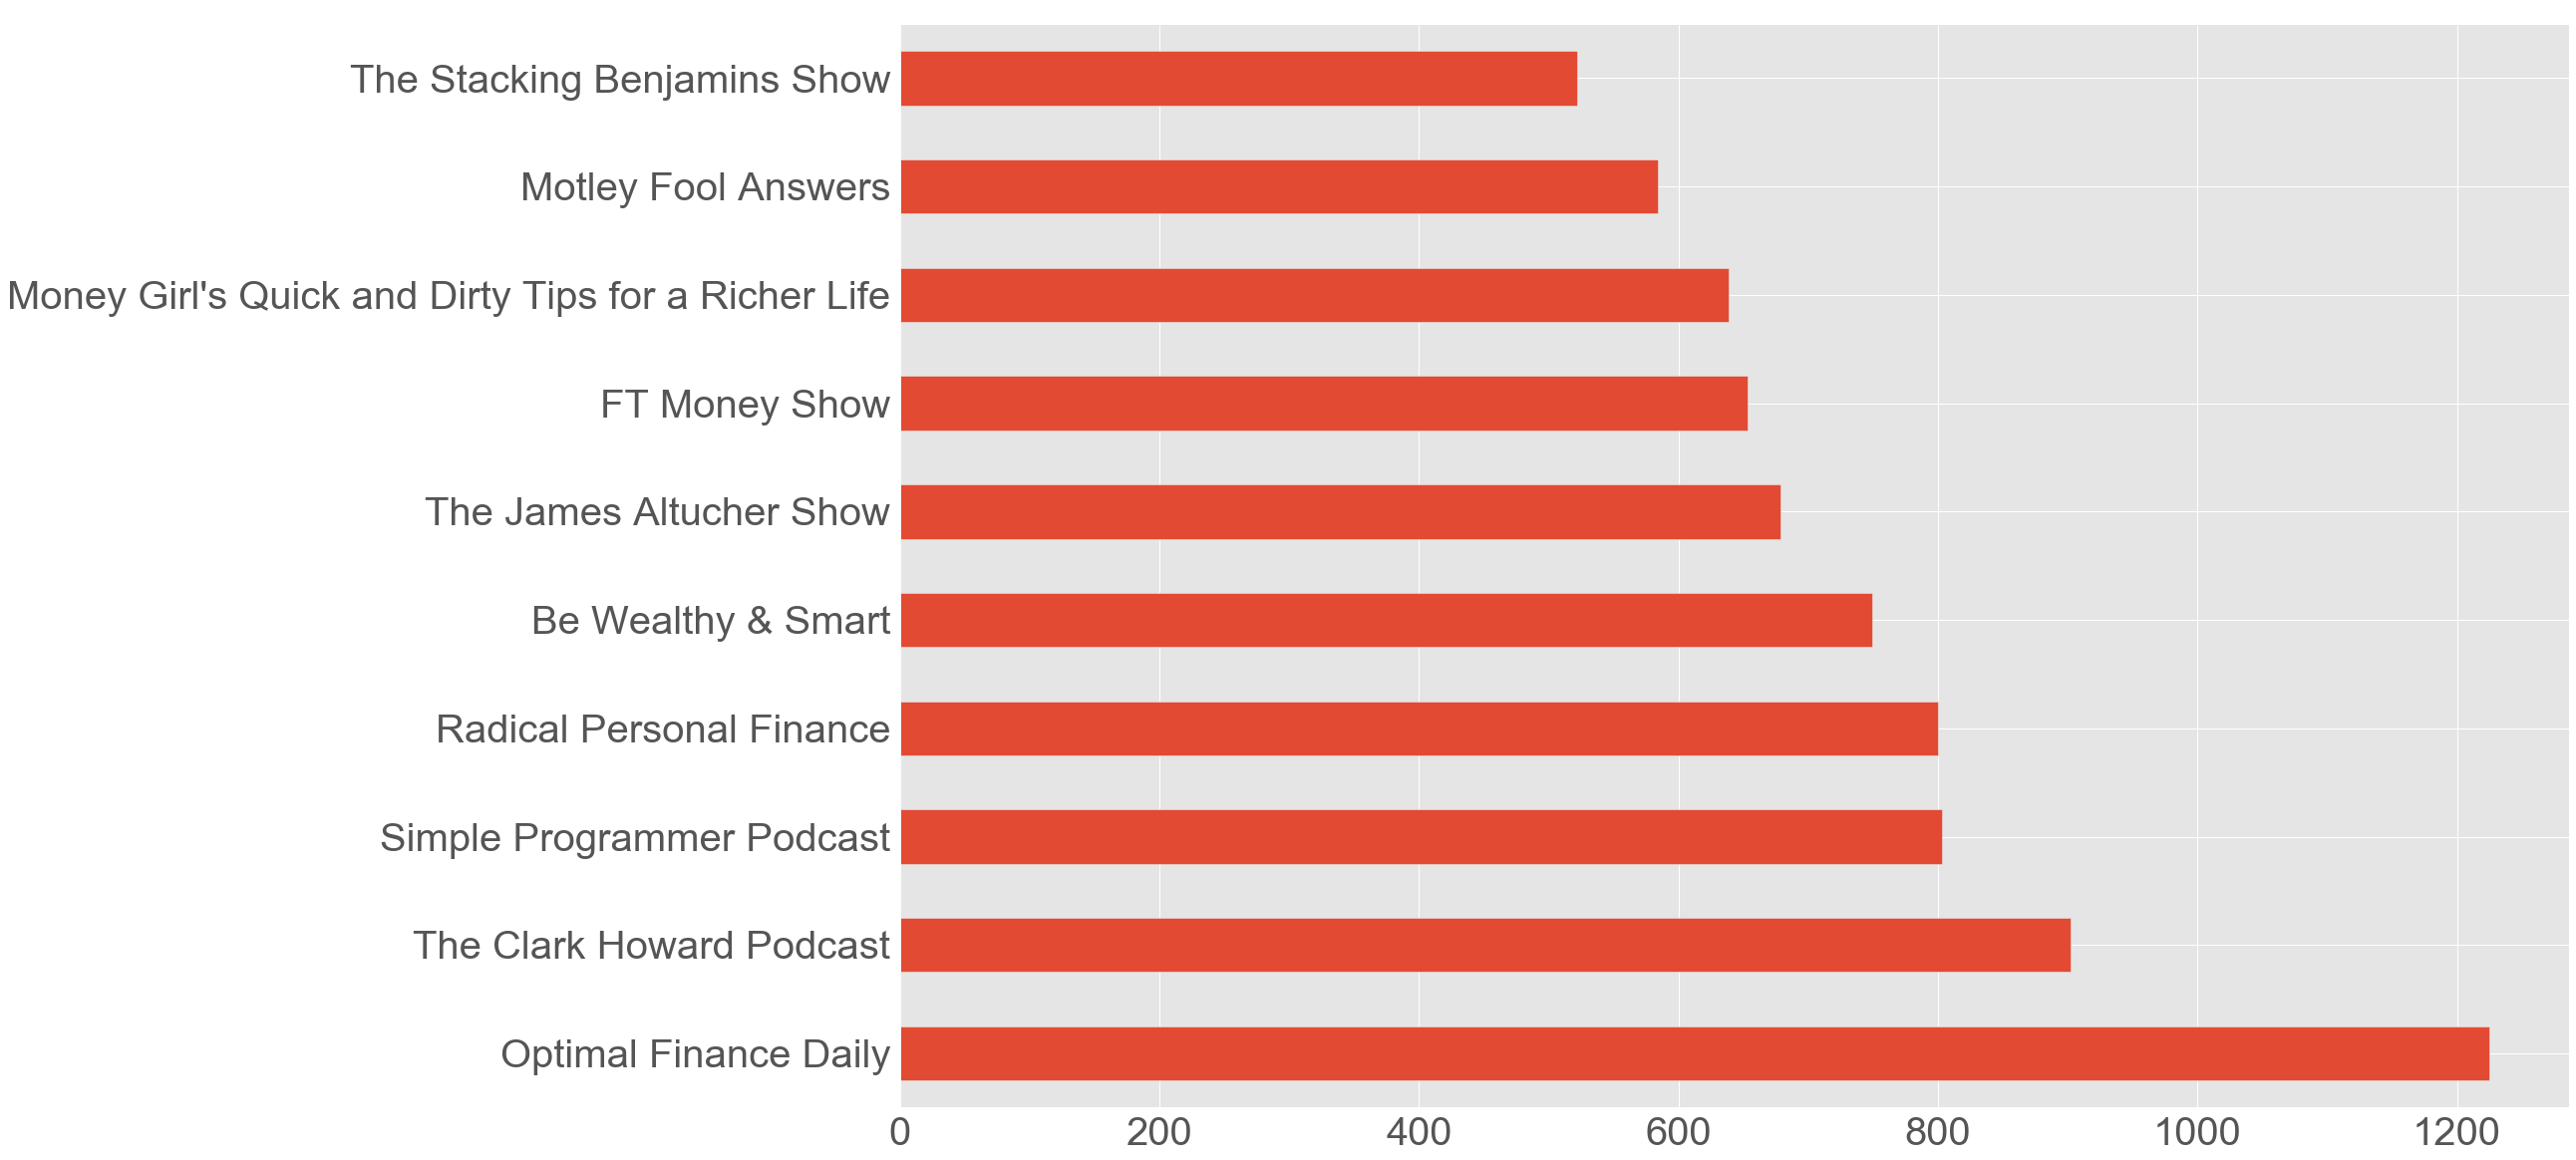

In [50]:
#Visualise top 10 shows by episode count

plt.figure(figsize=(30,20))
ep_count[:10].plot(kind='barh',fontsize=40)
plt.title('Top 10 Shows by Episode Count')
plt.savefig('Top_Epi_Shows.png');

In [51]:
ep_count.median() #median episode count without subsetting

16.0

In [53]:
#subset the episode count data now to keep shows with at least 200 or more episodes

ep_count = ep_count.where(lambda x: x >= 200).dropna()

In [55]:
#change the numbers to int

ep_count.astype(int)

Optimal Finance Daily                                                                                               1225
The Clark Howard Podcast                                                                                             902
Simple Programmer Podcast                                                                                            803
Radical Personal Finance                                                                                             800
Be Wealthy & Smart                                                                                                   749
The James Altucher Show                                                                                              679
FT Money Show                                                                                                        653
Money Girl's Quick and Dirty Tips for a Richer Life                                                                  639
Motley Fool Answers             

In [56]:
ep_count.median() #median episode count at this stage

450.5

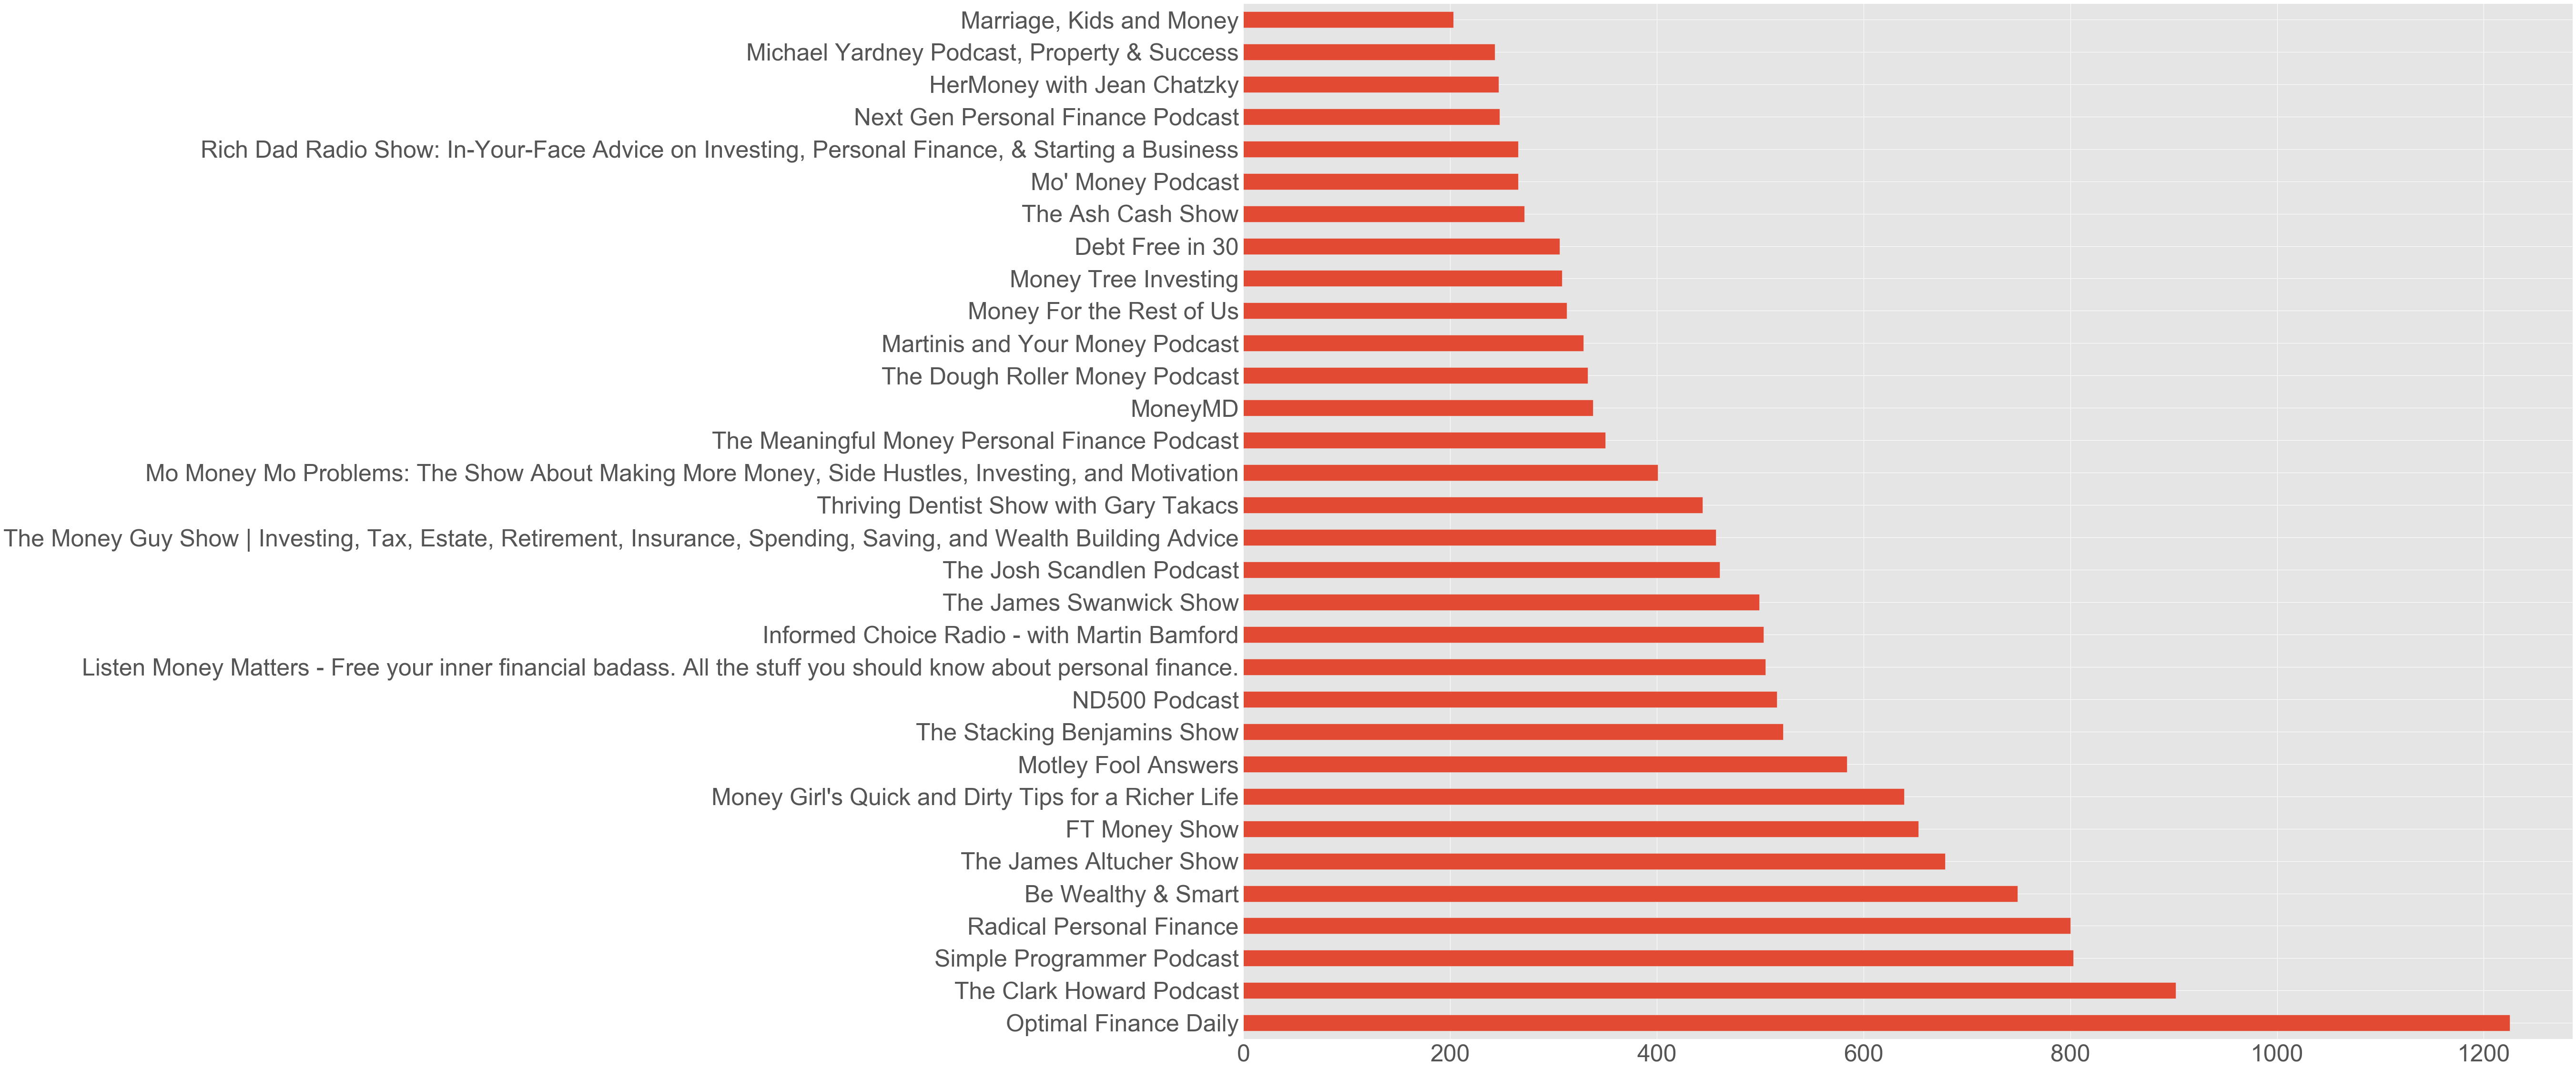

In [70]:
plt.figure(figsize=(50,40))
ep_count.plot(kind='barh',fontsize=50)
plt.savefig('200_Ep.png');

In [71]:
#which are the top 10 shows at this stage?

ep_count[:10]

Optimal Finance Daily                                  1225.0
The Clark Howard Podcast                                902.0
Simple Programmer Podcast                               803.0
Radical Personal Finance                                800.0
Be Wealthy & Smart                                      749.0
The James Altucher Show                                 679.0
FT Money Show                                           653.0
Money Girl's Quick and Dirty Tips for a Richer Life     639.0
Motley Fool Answers                                     584.0
The Stacking Benjamins Show                             522.0
Name: show_name, dtype: float64

In [96]:
#Analysing the top 10 shows by subsetting in a separate dataframe

df_top = df(df['show_name'] == ['Optimal Finance Daily','Clark Howard Podcast'])
df_top

ValueError: Lengths must match to compare